<a href="https://colab.research.google.com/github/ruchi243/Sales_Analysis_and_Forecasting/blob/main/Random_Forest_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [2]:
url = 'https://raw.githubusercontent.com/ruchi243/Exploratory_Data_Analysis/main/Sample%20-%20Superstore.csv'

In [3]:
import datetime as dt
dataset = pd.read_csv(url)

dataset['Order Date'] = pd.to_datetime(dataset['Order Date'])
dataset['Order Month'] = pd.to_datetime(dataset['Order Date']).dt.month
dataset['Order Year'] = pd.to_datetime(dataset['Order Date']).dt.year
dataset.drop(["Row ID", "Customer ID","Order ID","Postal Code","Product ID","Product Name","Country","Ship Date","Order Date","Customer Name"], axis = 1, inplace = True)


display(dataset.head())

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Order Month,Order Year
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,11,2016
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,11,2016
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,6,2016
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,10,2015
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,10,2015


In [4]:
encoder = LabelEncoder()

In [5]:
dataset['City']=encoder.fit_transform(dataset['City'])
dataset['Segment']=encoder.fit_transform(dataset['Segment'])
dataset['Ship Mode']=encoder.fit_transform(dataset['Ship Mode'])
dataset['State']=encoder.fit_transform(dataset['State'])
dataset['Region']=encoder.fit_transform(dataset['Region'])
dataset['Category']=encoder.fit_transform(dataset['Category'])
dataset['Sub-Category']=encoder.fit_transform(dataset['Sub-Category'])


In [6]:
X = dataset.drop("Sales",axis = 1)


Y = dataset['Sales']

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(6995, 12) (6995,)
(2999, 12) (2999,)


In [8]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X, Y) 

RandomForestRegressor(random_state=0)

In [10]:
# Use the forest's predict method on the test data
predictions = regressor.predict(X_test)# Calculate the absolute errors
errors = abs(predictions - Y_test)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors)))

Mean Absolute Error: 27


In [11]:
mape = 100 * (errors / Y_test)# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 86.01 %.


In [12]:
from sklearn.tree import export_graphviz
import pydot# Pull out one tree from the forest
tree = regressor.estimators_[5]# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot# Pull out one tree from the forest
tree = regressor.estimators_[5]# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', rounded = True, precision = 1)# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')# Write graph to a png file
graph.write_png('tree.png')

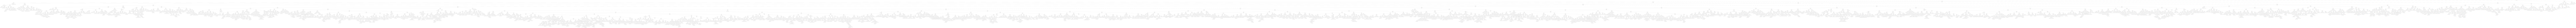

In [13]:
from IPython.display import Image, display
display(Image('tree.png'))

In [17]:
feature_list = ['shipmode','segment','city','state','region','category','subcat','quant','disc','pf','ordmon','ordyr']


In [18]:
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X,Y)# Extract the small tree
tree_small = rf_small.estimators_[5]# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

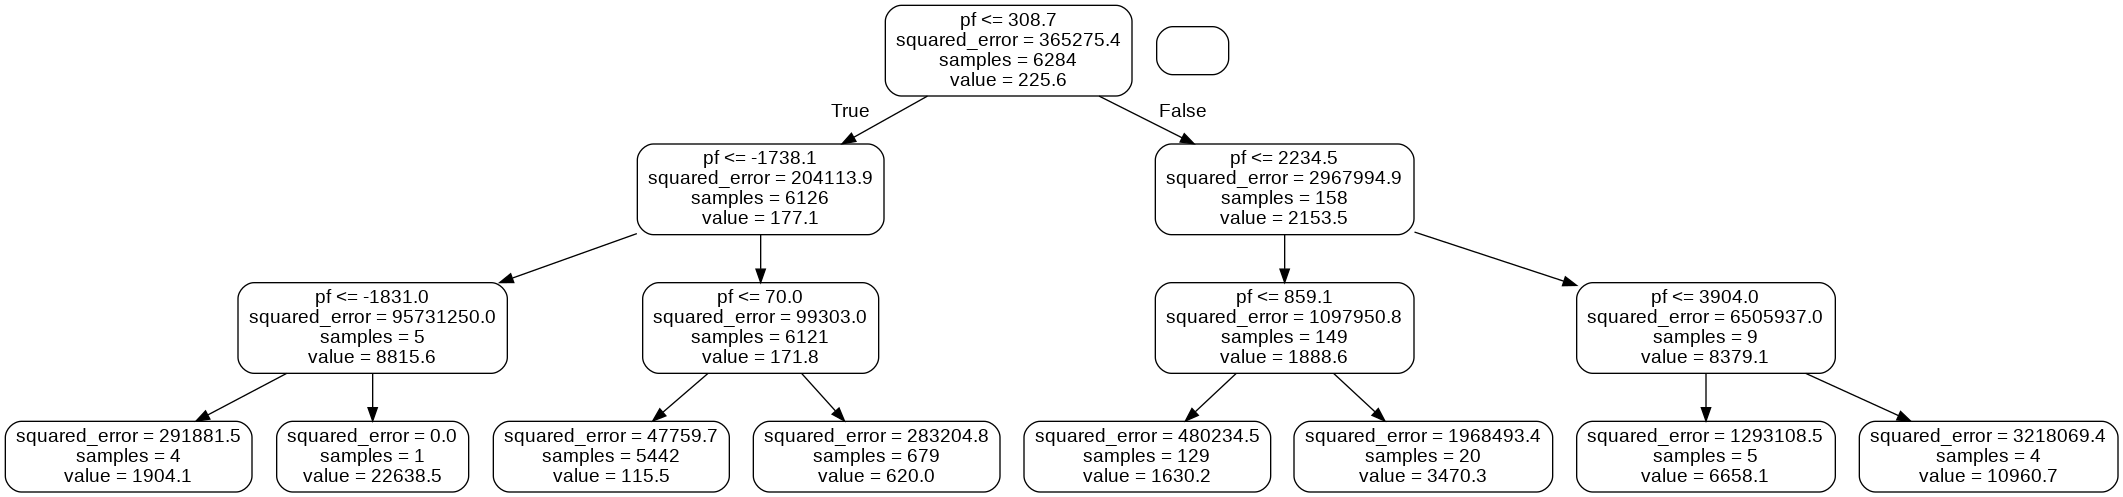

In [19]:
from IPython.display import Image, display
display(Image('small_tree.png'))

In [20]:
# Get numerical feature importances
importances = list(regressor.feature_importances_)# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list,importances)]# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: pf                   Importance: 0.78
Variable: disc                 Importance: 0.04
Variable: subcat               Importance: 0.03
Variable: ordmon               Importance: 0.03
Variable: segment              Importance: 0.02
Variable: state                Importance: 0.02
Variable: category             Importance: 0.02
Variable: quant                Importance: 0.02
Variable: city                 Importance: 0.01
Variable: region               Importance: 0.01
Variable: ordyr                Importance: 0.01
Variable: shipmode             Importance: 0.0


In [25]:
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)# Extract the two most important features
train_important = X_train[['Profit','Discount']]
test_important = X_test[['Profit','Discount']]# Train the random forest
rf_most_important.fit(train_important, Y_train)# Make predictions and determine the error
predictions2 = rf_most_important.predict(test_important)
errors = abs(predictions2 - Y_test)# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2))
mape = np.mean(100 * (errors / Y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 102.63
Accuracy: 26.54 %.
